# Assignment 1

## Exercise 1.1

rough sketch for ex 1.2:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



A:\Users\Antje\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


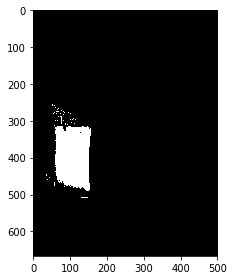

In [6]:
%matplotlib inline 
from skimage import io, data, color
import numpy as np

image = io.imread("testbilder/1_klein.jpg")
schwellwert = [104,22,43]
bereich = 30

count_rows = image.shape[0]
count_collumns = image.shape[1]

new_image = np.empty_like(image)

for x in range(count_rows):
    for y in range(count_collumns):
        pixel = image[x][y]
        
        isRCase = (schwellwert[0] - bereich) < pixel[0] < (schwellwert[0] + bereich)
        isGCase = (schwellwert[1] - bereich) < pixel[1] < (schwellwert[1] + bereich)
        isBCase = (schwellwert[2] - bereich) < pixel[2] < (schwellwert[2] + bereich)
        if isRCase and isGCase and isBCase:
            new_image[x][y] = np.array([255,255,255])
        else:
            new_image[x][y] = np.array([0,0,0])

new_image[40][1] = np.array([0,0,0])
io.imshow(new_image)
io.imsave("1_klein.jpg",new_image)


## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with one-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

test
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
done


A:\Users\Antje\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: 1_klein_erosion.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
A:\Users\Antje\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
A:\Users\Antje\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


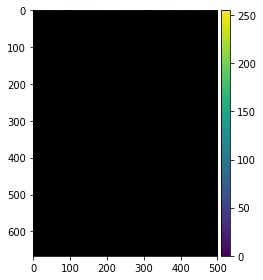

In [7]:
%matplotlib inline 
from skimage import io, data, color
import numpy as np

image = io.imread("1_klein.jpg")
#io.imshow(image)
print("test")
def erosion (image):
    count_rows = image.shape[0]
    count_collumns = image.shape[1]

    new_image = np.empty_like(image)
    white=np.array([255,255,255])
    black=np.array([0,0,0])

    for x in range(1, count_rows -1):
        for y in range(1, count_collumns -1):
            pixel = np.array(image[x][y])
            kernel = np.array([image[x + 1][y], image[x - 1][y],image[x][y - 1], image[x][ y + 1]])
            if np.array_equal(pixel,white):
                zahl=0
                for i in range(4):
                    if np.array_equal(kernel[i],white):
                        zahl+=1
                if (zahl<1):
                    new_image[x][y] = np.array(black)

    return(new_image)
    #new_image[40][1] = np.array([0,0,0])
    #io.imshow(new_image)
    io.imsave("1_klein_erosion.jpg",new_image)



def dilate (image):#hauptsächlich kopie der oberen Funktion; einziger unterschied liegt beim kernel-if und dass weiß gemalt wird
    count_rows = image.shape[0]
    count_collumns = image.shape[1]

    new_image = np.empty_like(image)
    white=np.array([255,255,255])
    black=np.array([0,0,0])

    for x in range(1, count_rows -1):
        for y in range(1, count_collumns -1):
            pixel = np.array(image[x][y])
            kernel = np.array([image[x + 1][y], image[x - 1][y],image[x][y - 1], image[x][ y + 1]])
            if np.array_equal(pixel,white):
                zahl=0
                for i in range(4):
                    if np.array_equal(kernel[i],white):
                        zahl+=1
                if (zahl>1):#oder >=
                    new_image[x][y] = np.array(white)
    return(new_image)

    #new_image[40][1] = np.array([0,0,0])
    #io.imshow(new_image)
    #io.imsave("1_klein.jpg",new_image)
    

def components(image):
#nach beschreibung von "One component at a time" im Artikel "Connected-component labeling" vom englischen Wikipedia
    count_rows = image.shape[0]
    count_collumns = image.shape[1]
    
    new_image = np.empty_like(image)
    
    matrix=np.empty_like(image)
    for x in range(count_rows):
        for y in range(count_collumns):
            matrix[x][y]=0
            
    white=np.array([255,255,255])
    black=np.array([0,0,0])
    queue=[]
    component_list=[]
    component=[]
    comp_number=1
    
    for x in range(1, count_rows -1):
        for y in range(1, count_collumns -1):
            pixel = np.array(image[x][y])
            if np.array_equal(pixel,white):
                element=[x,y,comp_number]
                if (element not in component) and (matrix[element[0]][element[1]]==0):
                    queue=queue.append(element)
                    while(queue != []):
                        elem= queue.pop()
                        kernel = np.array([[elem[0] + 1],[elem[1]]], [[elem[0] - 1],[elem[1]]],[[elem[0]],[elem[1] - 1]], [[elem[0]][ elem[1] + 1]])
                        for i in range(4):
                            if (np.array_equal(image[kernel[i][0]][kernel[i][1]],white)) and (matrix[kernel[i][0]][kernel[i][1]]==0):
                                queue=queue.append([kernel[i][0],kernel[i][1],comp_number])
                                matrix[kernel[i][0]][kernel[i][1]]=comp_number
                        component=component.append(elem)
                component_number+=1
    print("components")
    #io.imshow(new_image)
    return(component_list)


def bounding_box(image):
    corners=[]
    for i in range(30):
        print("hi")
        image = erosion(image)
    io.imsave("1_klein_erosion.jpg",image)
    io.imshow(image)

    

bounding_box(image)


print("done")
        
            
        
                                     




## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)